In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

In [6]:
# we want to use an exponential moving average to analyze 10 CAC40 
# companies to find out whether to buy or sell.
# First we retrieve the 'url' wikipedia which contains the dataframes with the companies names and tickers
url = 'https://fr.wikipedia.org/wiki/CAC_40'
datasets = pd.read_html(url)
nombre_de_datasets = len(datasets)

# We notice that the third table of the page [2] contains such information so we isolate this table
df = datasets[2]

# We keep the columns of interest, that is the companies name and the tickers which are located
# in the first and second column
df = df.iloc[:, :2]

# Then we set the index as the name of the companies
df = df.set_index(df.columns[0])

# Ultimatly we rename the second column as 'tickers' beacause it contains the tickers
df = df.rename(columns={'Mnémo' : 'tickers'})

# check the result
df

,tickers
Société,
Accor,AC
Air liquide,AI
Airbus,AIR
ArcelorMittal,MT
Axa,CS
BNP Paribas,BNP
Bouygues,EN
Capgemini,CAP
Carrefour,CA


In [7]:
# We select randomly 10 compagnies of interest to compute our exponential mobile averages
df_sample = df.sample(n=20)
df_sample

,tickers
Société,
Vinci,DG
L'Oréal,OR
Accor,AC
Legrand,LR
Kering,KER
BNP Paribas,BNP
Veolia,VIE
Engie,ENGI
Thales,HO


In [8]:
tickers = df_sample['tickers'].to_list()
tickers

['DG',
 'OR',
 'AC',
 'LR',
 'KER',
 'BNP',
 'VIE',
 'ENGI',
 'HO',
 'DSY',
 'STLAP',
 'BN',
 'SU',
 'ERF',
 'RNO',
 'MC',
 'ML',
 'TEP',
 'EDEN',
 'RI']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['LR']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2023-01-01 -> 2024-08-01)')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['KER']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2023-01-01 -> 2024-08-01)')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['BNP']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2023-01-01 -> 2024-08-01)')


$LR: possibly delisted; No price data found  (1d 2023-01-01 -> 2024-08-01)
$KER: possibly delisted; No price data found  (1d 2023-01-01 -> 2024-08-01)
$BNP: possibly delisted; No price data found  (1d 2023-01-01 -> 2024-08-01)


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['VIE']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ENGI']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['HO']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2023-01-01 -> 2024-08-01)')
[*********************100%%**********************]  1 of 1 completed


$HO: possibly delisted; No price data found  (1d 2023-01-01 -> 2024-08-01)


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['STLAP']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['RNO']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2023-01-01 -> 2024-08-01)')
[*********************100%%**********************]  1 of 1 completed


$RNO: possibly delisted; No price data found  (1d 2023-01-01 -> 2024-08-01)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['TEP']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2023-01-01 -> 2024-08-01)')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

$TEP: possibly delisted; No price data found  (1d 2023-01-01 -> 2024-08-01)
$RI: possibly delisted; No price data found  (1d 2023-01-01 -> 2024-08-01)




1 Failed download:
['RI']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2023-01-01 -> 2024-08-01)')


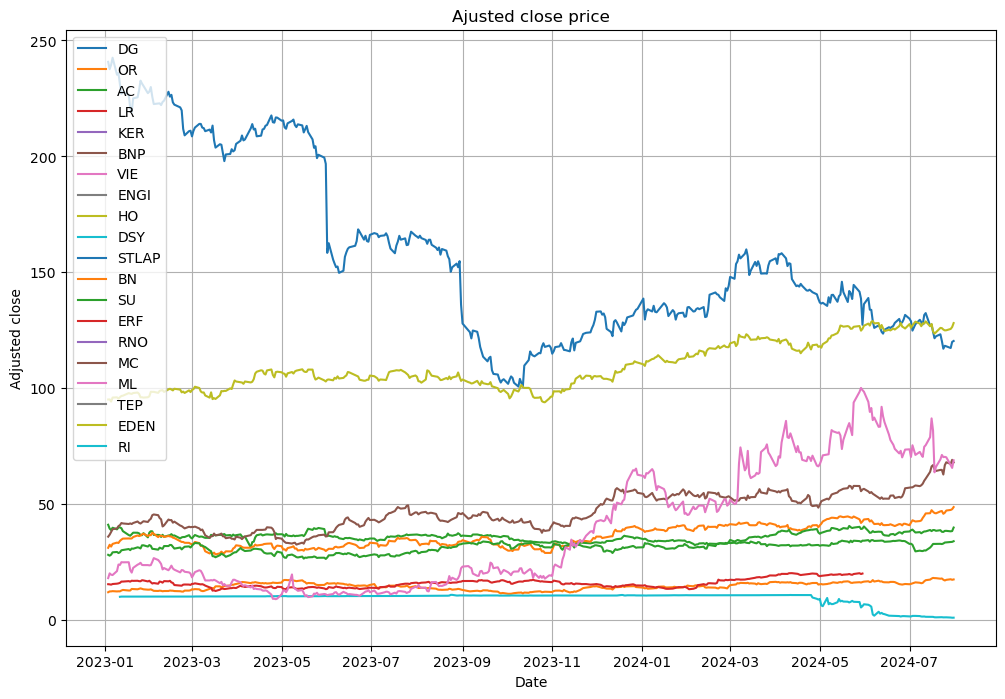

In [9]:
# Plot every stock on one graph

current_date = datetime.now().strftime('%Y-%m-%d')

data = {}

for ticker in tickers:
    df = yf.download(ticker, start="2023-01-01", end=current_date)
    data[ticker] = df

plt.figure(figsize=(12,8))

for ticker, df in data.items():
    if 'Adj Close' in df.columns:
        plt.plot(df.index, df['Adj Close'], label=ticker)
    else:
        print(f"Colonne 'Adj Close' does not exist for {ticker}")

plt.xlabel('Date')
plt.ylabel('Adjusted close')
plt.title('Ajusted close price')
plt.legend()
plt.grid(True)

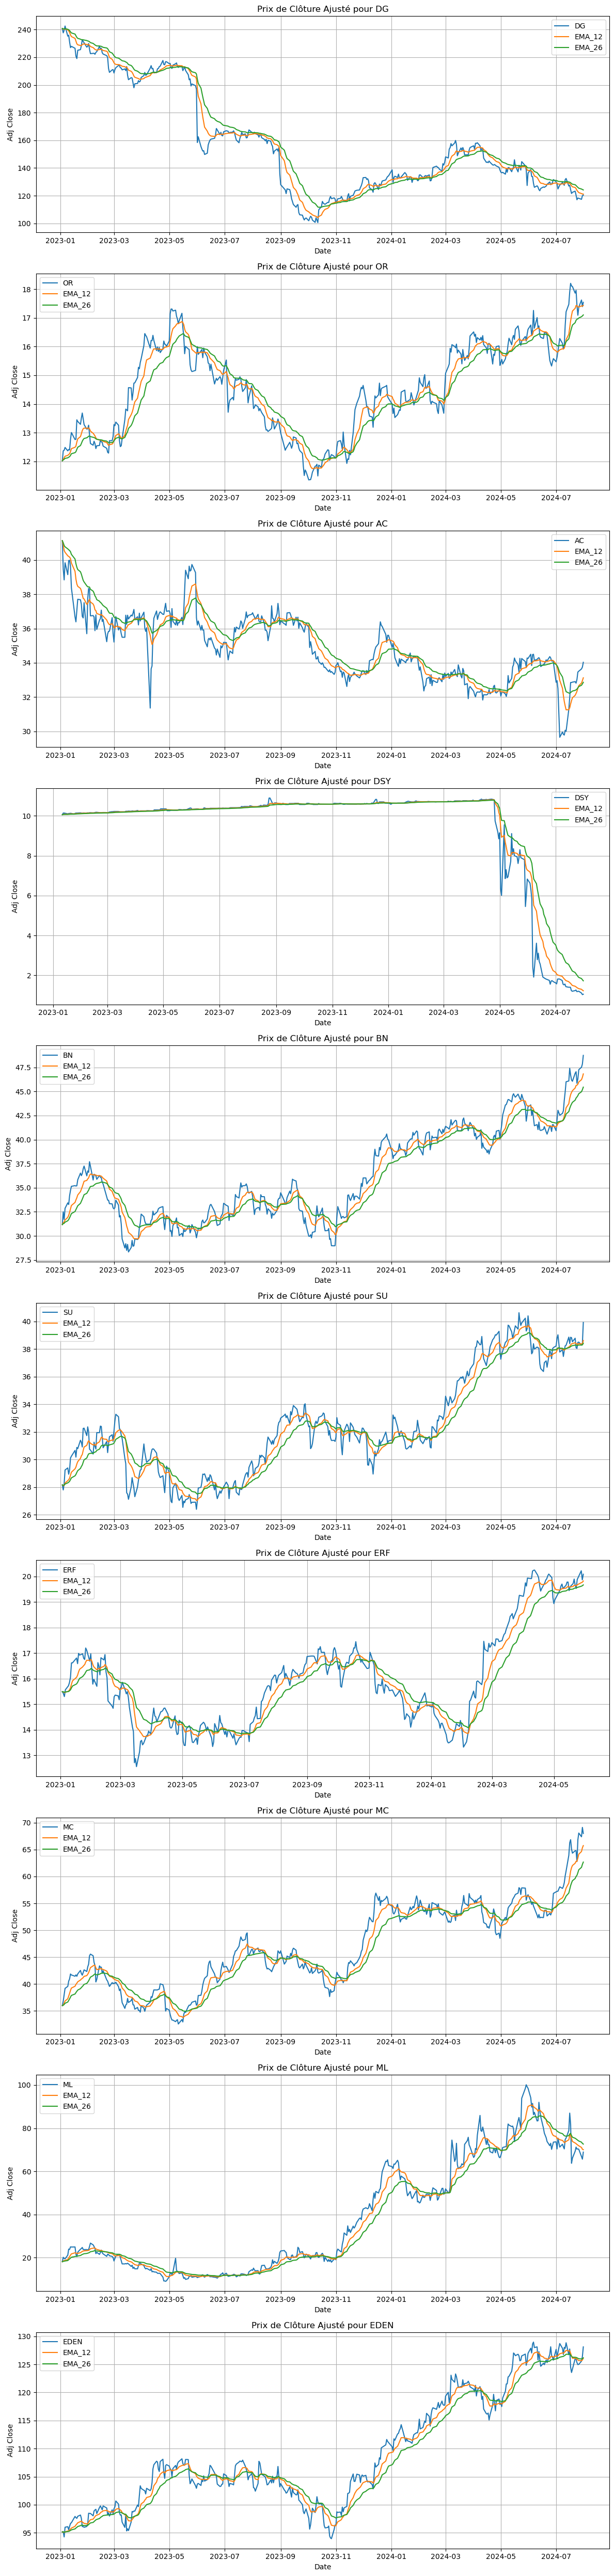

In [12]:
# Create one graph for one particular stock (easier to read)

# Let's first filtering data because some data are not available for some tickers
filtered_data = {}
for ticker, df in data.items():
    if 'Adj Close' in df.columns:
        if not df['Adj Close'].isna().all():  # Check if Adj CLose contains data and not NaN
            filtered_data[ticker] = df # if it contains data we add it to our dictionary

num_tickers = len(filtered_data)

# Create the bases of the plots with an axis objects named 'ax' et a figure object named 'fig'
fig, axes = plt.subplots(nrows=num_tickers, ncols=1, figsize=(12, 50)) #(width, height)



# Tracer les données pour chaque ticker filtré
for ax, (ticker, df) in zip(axes, filtered_data.items()):
    
    # Calculate exponential mobile average 12 and 26
    df['EMA_12'] = df['Adj Close'].ewm(span=12, adjust=False).mean()
    df['EMA_26'] = df['Adj Close'].ewm(span=26, adjust=False).mean()
   

# check if crossing and the direction of the cross (up or down)
    crossings = df[(df['EMA_12'] > df['EMA_26']) & 
                  (df['EMA_12'].shift(1) < df['EMA_26'].shift(1)) | 
                  (df['EMA_12'] < df['EMA_26']) & 
                  (df['EMA_12'].shift(1) > df['EMA_26'].shift(1))]
    
    
    ax.plot(df.index, df['Adj Close'], label=ticker)
    ax.plot(df.index, df['EMA_12'], label='EMA_12')
    ax.plot(df.index, df['EMA_26'], label='EMA_26')
    
    ax.set_title(f'Prix de Clôture Ajusté pour {ticker}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Adj Close')
    ax.grid(True)
    ax.legend()


# Adjust spacing to avoid overlapping
plt.tight_layout()

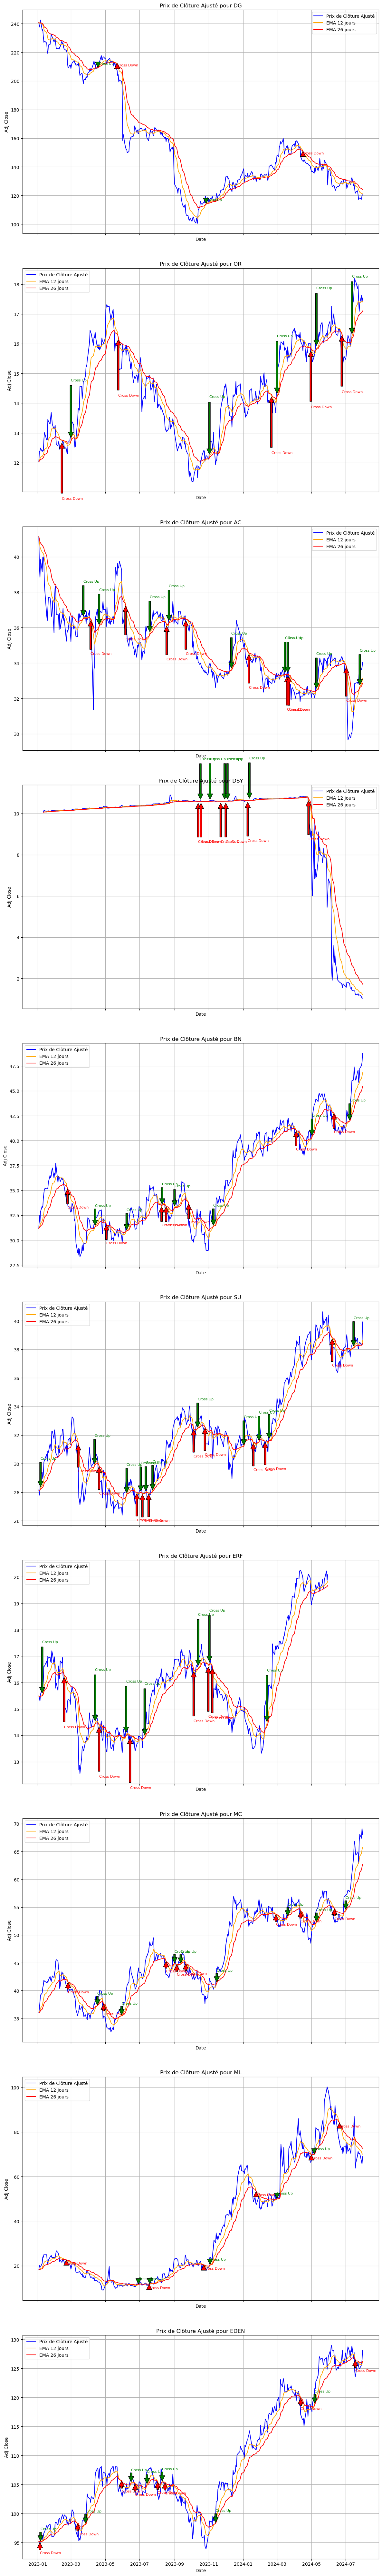

In [13]:
# Let's first filtering data because some data are not available for some tickers
filtered_data = {}
for ticker, df in data.items():
    if 'Adj Close' in df.columns:
        if not df['Adj Close'].isna().all():  # Check if Adj CLose contains data and not NaN
            filtered_data[ticker] = df # if it contains data we add it to our dictionary

# Nombre de tickers après filtrage
num_tickers = len(filtered_data)

# Créer une figure avec une grille de sous-graphes
fig, axes = plt.subplots(nrows=num_tickers, ncols=1, figsize=(12, 80), sharex=True)

# Tracer les données pour chaque ticker filtré
for ax, (ticker, df) in zip(axes, filtered_data.items()):
    # Calcul des moyennes mobiles exponentielles (MME) à 12 et 26 jours
    df['EMA_12'] = df['Adj Close'].ewm(span=12, adjust=False).mean()
    df['EMA_26'] = df['Adj Close'].ewm(span=26, adjust=False).mean()
   
    # Identifier les croisements
    crossings = df[
        ((df['EMA_12'] > df['EMA_26']) & (df['EMA_12'].shift(1) < df['EMA_26'].shift(1))) |
        ((df['EMA_12'] < df['EMA_26']) & (df['EMA_12'].shift(1) > df['EMA_26'].shift(1)))
    ]
    
    # Tracer les prix de clôture ajustés et les MME
    ax.plot(df.index, df['Adj Close'], label='Prix de Clôture Ajusté', color='blue')
    ax.plot(df.index, df['EMA_12'], label='EMA 12 jours', color='orange')
    ax.plot(df.index, df['EMA_26'], label='EMA 26 jours', color='red')
    
    # Annoter les croisements
    for date, row in crossings.iterrows():
        if row['EMA_12'] > row['EMA_26']:
            ax.annotate(
                'Cross Up',
                xy=(date, row['EMA_12']),
                xytext=(date, row['EMA_12'] + 2),
                arrowprops=dict(facecolor='green', shrink=0.05),
                fontsize=8,
                color='green'
            )
        else:
            ax.annotate(
                'Cross Down',
                xy=(date, row['EMA_26']),
                xytext=(date, row['EMA_26'] - 2),
                arrowprops=dict(facecolor='red', shrink=0.05),
                fontsize=8,
                color='red'
            )

    # Ajouter des titres et des labels
    ax.set_title(f'Prix de Clôture Ajusté pour {ticker}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Adj Close')
    ax.grid(True)
    ax.legend()

# Ajuster les espacements pour éviter les chevauchements
plt.tight_layout()

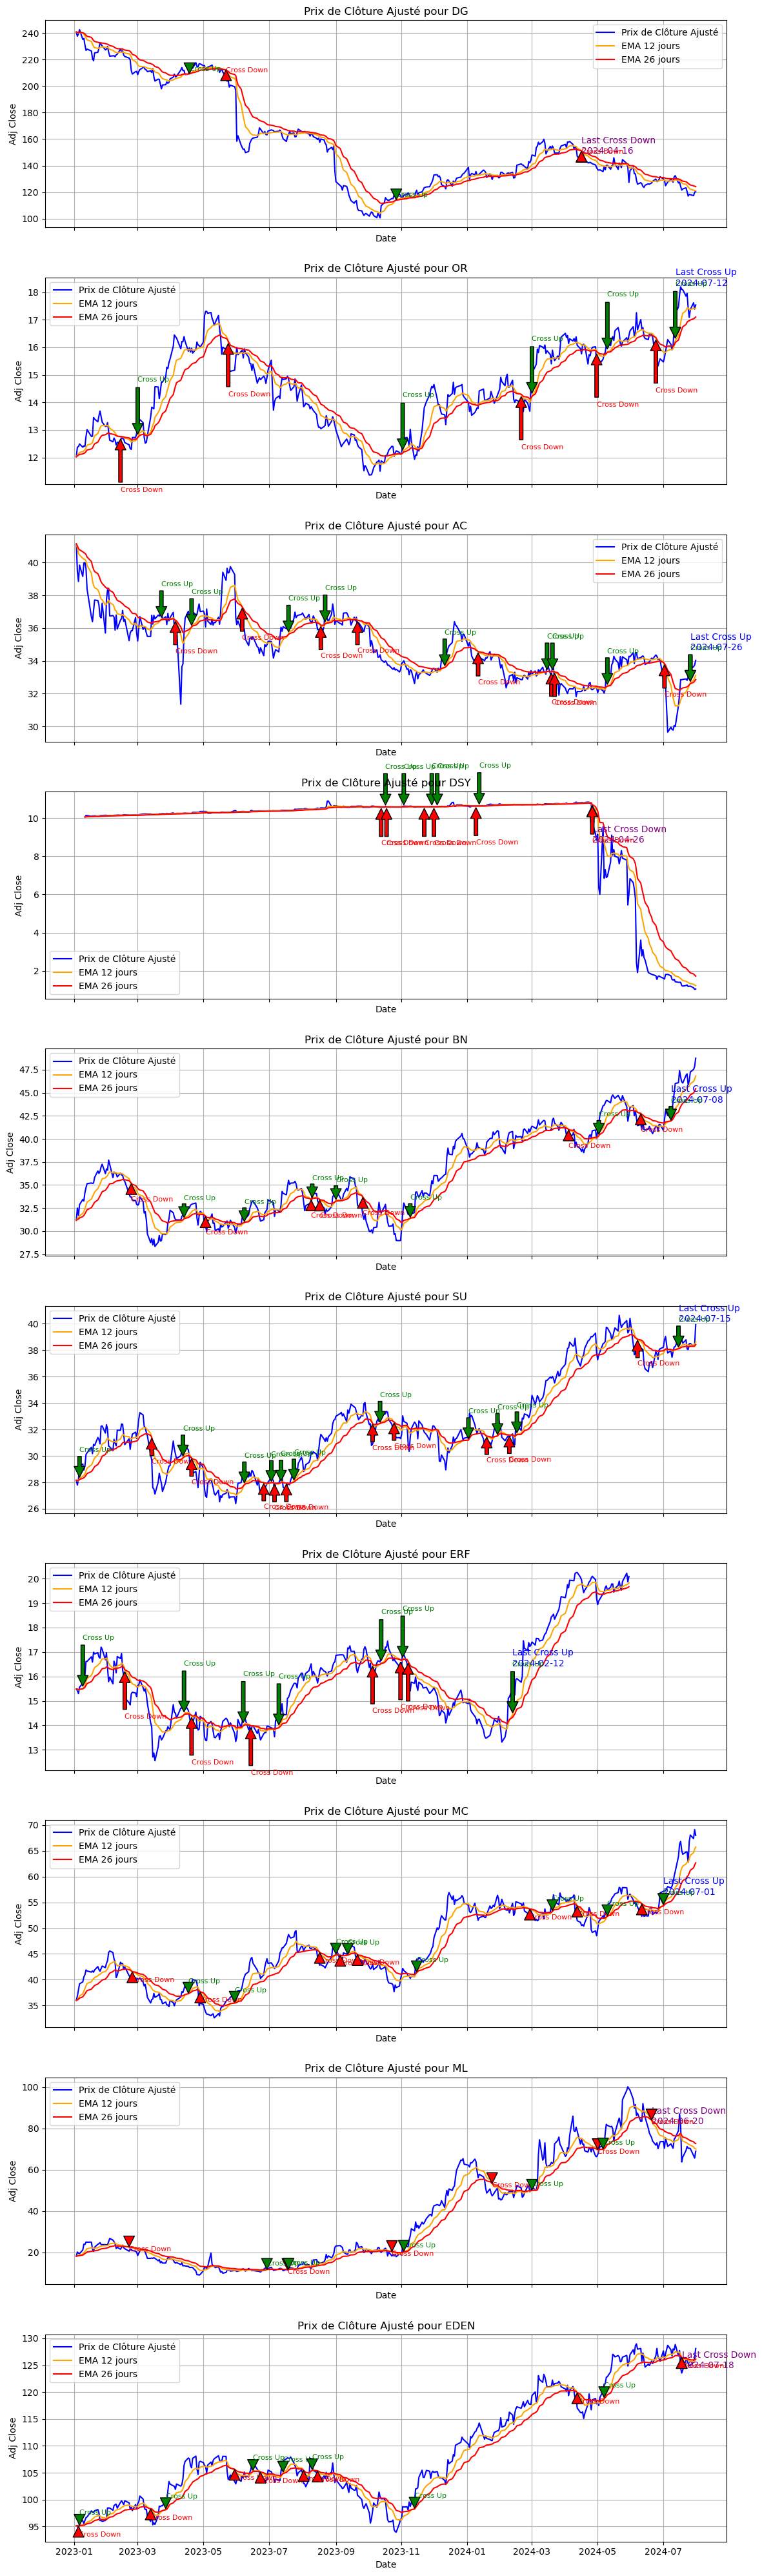

In [16]:
# Créer une figure avec une grille de sous-graphes
fig, axes = plt.subplots(nrows=num_tickers, ncols=1, figsize=(12, 4 * num_tickers), sharex=True)

# Tracer les données pour chaque ticker filtré
for ax, (ticker, df) in zip(axes, filtered_data.items()):
    # Calcul des moyennes mobiles exponentielles (MME) à 12 et 26 jours
    df['EMA_12'] = df['Adj Close'].ewm(span=12, adjust=False).mean()
    df['EMA_26'] = df['Adj Close'].ewm(span=26, adjust=False).mean()
   
    # Identifier les croisements
    crossings = df[
        ((df['EMA_12'] > df['EMA_26']) & (df['EMA_12'].shift(1) < df['EMA_26'].shift(1))) |
        ((df['EMA_12'] < df['EMA_26']) & (df['EMA_12'].shift(1) > df['EMA_26'].shift(1)))
    ]
    
    # Trouver le dernier croisement
    if not crossings.empty:
        last_cross_date = crossings.index[-1]
        last_cross_row = crossings.loc[last_cross_date]
        
        # Annoter le dernier croisement
        if last_cross_row['EMA_12'] > last_cross_row['EMA_26']:
            ax.annotate(
                f'Last Cross Up\n{last_cross_date.date()}',
                xy=(last_cross_date, last_cross_row['EMA_12']),
                xytext=(last_cross_date, last_cross_row['EMA_12'] + 2),
                arrowprops=dict(facecolor='blue', shrink=0.05),
                fontsize=10,
                color='blue'
            )
        else:
            ax.annotate(
                f'Last Cross Down\n{last_cross_date.date()}',
                xy=(last_cross_date, last_cross_row['EMA_26']),
                xytext=(last_cross_date, last_cross_row['EMA_26'] - 2),
                arrowprops=dict(facecolor='purple', shrink=0.05),
                fontsize=10,
                color='purple'
            )
    
    # Tracer les prix de clôture ajustés et les MME
    ax.plot(df.index, df['Adj Close'], label='Prix de Clôture Ajusté', color='blue')
    ax.plot(df.index, df['EMA_12'], label='EMA 12 jours', color='orange')
    ax.plot(df.index, df['EMA_26'], label='EMA 26 jours', color='red')
    
    # Annoter tous les croisements
    for date, row in crossings.iterrows():
        if row['EMA_12'] > row['EMA_26']:
            ax.annotate(
                'Cross Up',
                xy=(date, row['EMA_12']),
                xytext=(date, row['EMA_12'] + 2),
                arrowprops=dict(facecolor='green', shrink=0.05),
                fontsize=8,
                color='green'
            )
        else:
            ax.annotate(
                'Cross Down',
                xy=(date, row['EMA_26']),
                xytext=(date, row['EMA_26'] - 2),
                arrowprops=dict(facecolor='red', shrink=0.05),
                fontsize=8,
                color='red'
            )

    # Ajouter des titres et des labels
    ax.set_title(f'Prix de Clôture Ajusté pour {ticker}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Adj Close')
    ax.grid(True)
    ax.legend()

# Ajuster les espacements pour éviter les chevauchements
plt.tight_layout()